In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

### Data Preparation

In [2]:
#Read crypto_data.csv into Pandas. The dataset was obtained from CryptoCompare.
dataread = pd.read_csv(Path('crypto_data.csv'))
dataread

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
#Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. 
traded_df = dataread.loc[dataread['IsTrading'] == True]
traded_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
#Once you have done this, drop the IsTrading column from the dataframe.
traded_clean_df = traded_df.drop('IsTrading', axis=1)
traded_clean_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
traded_clean_df.count()

Unnamed: 0         1144
CoinName           1144
Algorithm          1144
ProofType          1144
TotalCoinsMined     685
TotalCoinSupply    1144
dtype: int64

In [6]:
#Remove all rows that have at least one null value.
traded_cleandrop_df = traded_clean_df.dropna()
traded_cleandrop_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
mined_df = traded_cleandrop_df[traded_cleandrop_df['TotalCoinsMined'] > 0]
mined_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
#delete the CoinName and ticker from the original dataframe and convert TotalCoinSupply column to float format.
mined_clean_df = mined_df.drop(['CoinName','Unnamed: 0'], axis=1)
mined_clean_df['TotalCoinSupply'] = mined_clean_df['TotalCoinSupply'].astype(float)
mined_clean_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
8,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2.000000e+09
1242,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
1245,CryptoNight,PoW,9.802226e+08,1.400223e+09
1246,Equihash,PoW,7.296538e+06,2.100000e+07


In [9]:
#check data types 
mined_clean_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [10]:
#convert features with text values into numerical data.
mined_clean_dummies = pd.get_dummies(mined_clean_df)
mined_clean_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Takeaway: dummy variables created additional columns, expanding from 4 inital to 98

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mined_scaled = scaler.fit_transform(mined_clean_dummies)
mined_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [12]:
print(f"The number of features is {len(mined_scaled[0])}")

The number of features is 98


### Dimensionality Reduction

In [13]:
#Perform dimensionality reduction with PCA, preserving 90% of the explained variance.
pca = PCA(n_components=0.9)
mined_scaled_pca = pca.fit_transform(mined_scaled)
mined_scaled_pca_df = pd.DataFrame(mined_scaled_pca)
mined_scaled_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         3.08960988e-15,  2.86606753e-15,  1.58319965e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         4.93371958e-15,  1.80038582e-15,  1.00489363e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -6.09849526e-14,  6.98203264e-15, -6.42207786e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         3.76926112e-14,  1.57627124e-15,  4.86009394e-15],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         5.64583013e-16, -2.14316679e-15,  2.95499880e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         4.70610499e-15, -1.63649594e-15,  5.62511848e-15]])

In [14]:
print(f"The number of features is {len(mined_scaled_pca[0])}")

The number of features is 74


The number of features reduced from 98 to 74 after performing dimensionality reduction with PCA, preserving 90% of the explained variance

In [21]:
#reduce the dataset dimensions with t-SNE
tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(mined_scaled_pca_df)
tsne_features.shape

(532, 2)

In [22]:
tsne_features

array([[-12.015326  ,  23.958048  ],
       [ -7.5498443 ,  28.909782  ],
       [  0.91683626,  28.662159  ],
       ...,
       [-16.975395  , -28.0016    ],
       [ -2.680766  , -27.42664   ],
       [ 26.569773  ,  -9.189057  ]], dtype=float32)

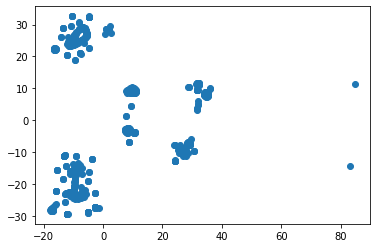

In [23]:
# The first column of transformed features
mined_scaled_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
mined_scaled_pca_df['y'] = tsne_features[:,1]
#plot scatter chart
plt.scatter(mined_scaled_pca_df['x'], mined_scaled_pca_df['y'])
plt.show()

Takeaway: Based on the model output, the scatter plot suggests that there might be 4-5 distinct clusters. 

### Cluster Analysis with k-Means

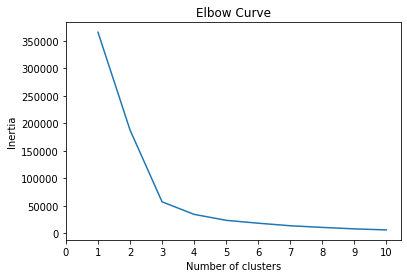

In [25]:
#Create an elbow plot to identify the best number of clusters. 
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Takeaway: a cluster analysis with k-Means suggests that the elbow of the plot is at k =3, suggesting that there are 3 distinct clusters. Although k=4 could also be considered. 

### Recommendations

Based on the employed clustering algorithms and analysis of the model output, cryptocurrencies can be grouped together with other similar cryptocurrencies. Furthermore 3 to 4 distinct clusters can be created. 